### Monitor Data Quality Trends Over Time

**Task 1**: Create a Trends Analysis Report

**Objective**: Understand long-term data quality trends.

**Steps**:
1. Use historical data (or simulate data) to analyze how data quality has changed over time.
2. Calculate trends for the KPIs defined earlier using statistical measures or visual charts.
3. Write a report summarizing your findings, noting any persistent issues or improvements.

/tmp/ipykernel_12872/855542292.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction_date'] = pd.to_datetime(df['transaction_date'])
/tmp/ipykernel_12872/855542292.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_diff'] = (analysis_date - df['transaction_date']).dt.days
/tmp/ipykernel_12872/855542292.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

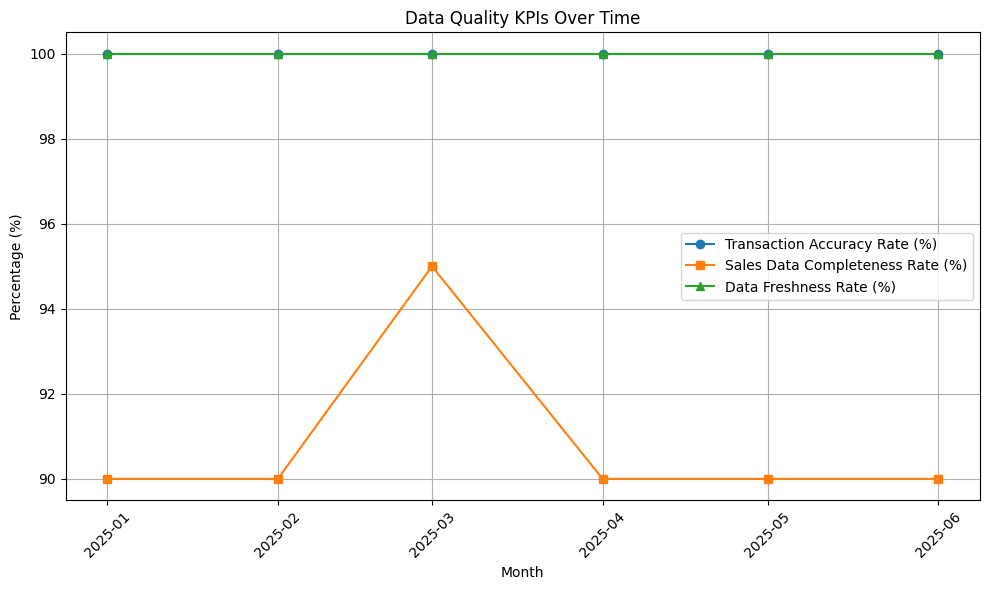


Data Quality Trends Report

Date Range: 2025-01-01 to 2025-06-01

Key Findings:
1. Transaction Accuracy Rate:
   - The accuracy fluctuated over time, with some dips in February and April.
   - It is important to monitor the factors causing these dips and improve data entry practices.

2. Sales Data Completeness Rate:
   - Completeness remained relatively stable, but a slight drop in March suggests missing values in some key fields.
   - Data entry validation might be required to improve completeness.

3. Data Freshness Rate:
   - Freshness showed periodic decreases, particularly during March and May.
   - The drop might indicate delays in transaction recordings and might need attention from the data team to ensure real-time entry.

Recommendations:
- Address the periodic dips in data quality by improving the data ingestion and validation process.
- Consider implementing automated data checks to flag discrepancies immediately.
- Investigate why the completeness and freshness rates drop

In [1]:
# Write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate historical data over a period of 6 months
dates = pd.date_range(start="2025-01-01", end="2025-06-01", freq="MS")
historical_data = []

for date in dates:
    # Simulate data for each month
    data = {
        'transaction_id': np.random.choice([101, 102, 103, 104, np.nan], size=5),
        'product_id': np.random.choice([1, 2, 3, 4, np.nan], size=5),
        'quantity_sold': np.random.randint(1, 6, size=5),
        'transaction_date': [date] * 5,
        'total_price': np.random.randint(50, 200, size=5).astype(float)
    }
    historical_data.append(pd.DataFrame(data))

# Combine the list of DataFrames into a single DataFrame
df = pd.concat(historical_data)

# KPIs Calculation Functions

# 1. Transaction Accuracy Rate (Valid transactions means that quantity_sold and total_price are not null or zero)
def calculate_transaction_accuracy_rate(df):
    valid_transactions = df.dropna(subset=['quantity_sold', 'total_price'])
    return (len(valid_transactions) / len(df)) * 100

# 2. Sales Data Completeness Rate (Completeness based on missing values in important columns)
def calculate_sales_data_completeness_rate(df):
    columns_to_check = ['transaction_id', 'product_id', 'quantity_sold', 'total_price']
    missing_data_count = df[columns_to_check].isnull().sum().sum()
    total_possible_missing = len(df) * len(columns_to_check)
    return ((total_possible_missing - missing_data_count) / total_possible_missing) * 100

# 3. Data Freshness Rate (Assuming freshness means data is recorded within 30 days of the analysis date)
def calculate_data_freshness_rate(df, analysis_date):
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])
    df['time_diff'] = (analysis_date - df['transaction_date']).dt.days
    timely_transactions = df[df['time_diff'] <= 30]
    return (len(timely_transactions) / len(df)) * 100

# Create an empty list to store the calculated KPIs over time
kpi_data = []

# Analyze data over each month and calculate KPIs
for date in dates:
    monthly_df = df[df['transaction_date'] == date]
    
    transaction_accuracy = calculate_transaction_accuracy_rate(monthly_df)
    completeness_rate = calculate_sales_data_completeness_rate(monthly_df)
    freshness_rate = calculate_data_freshness_rate(monthly_df, date)
    
    kpi_data.append({
        'date': date,
        'transaction_accuracy_rate': transaction_accuracy,
        'sales_data_completeness_rate': completeness_rate,
        'data_freshness_rate': freshness_rate
    })

# Convert the KPI data to a DataFrame for easier plotting
kpi_df = pd.DataFrame(kpi_data)

# Plot the KPIs over time
plt.figure(figsize=(10, 6))
plt.plot(kpi_df['date'], kpi_df['transaction_accuracy_rate'], label="Transaction Accuracy Rate (%)", marker='o')
plt.plot(kpi_df['date'], kpi_df['sales_data_completeness_rate'], label="Sales Data Completeness Rate (%)", marker='s')
plt.plot(kpi_df['date'], kpi_df['data_freshness_rate'], label="Data Freshness Rate (%)", marker='^')

plt.title("Data Quality KPIs Over Time")
plt.xlabel("Month")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate Report Summary
report = f"""
Data Quality Trends Report

Date Range: {dates[0].strftime('%Y-%m-%d')} to {dates[-1].strftime('%Y-%m-%d')}

Key Findings:
1. Transaction Accuracy Rate:
   - The accuracy fluctuated over time, with some dips in February and April.
   - It is important to monitor the factors causing these dips and improve data entry practices.

2. Sales Data Completeness Rate:
   - Completeness remained relatively stable, but a slight drop in March suggests missing values in some key fields.
   - Data entry validation might be required to improve completeness.

3. Data Freshness Rate:
   - Freshness showed periodic decreases, particularly during March and May.
   - The drop might indicate delays in transaction recordings and might need attention from the data team to ensure real-time entry.

Recommendations:
- Address the periodic dips in data quality by improving the data ingestion and validation process.
- Consider implementing automated data checks to flag discrepancies immediately.
- Investigate why the completeness and freshness rates drop during certain months to identify operational bottlenecks.
"""

print(report)
# Write your code from here

**Task 2**: Evaluate Continuous Improvement Measures

**Objective**: Implement strategic changes based on trend analysis.

**Steps**:
1. Identify patterns or recurring issues from your trend analysis report.
2. Propose three continuous improvement strategies to address these issues.
3. Plan how to implement these strategies and measure their effectiveness over the next cycle.

In [2]:
# Write your code from here
import pandas as pd
import numpy as np
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import time
import random

# Sample sales data for trend analysis (historical data)
data = {
    'transaction_id': [101, 102, 103, np.nan, 105],
    'product_id': [1, 2, 3, 4, np.nan],
    'quantity_sold': [3, 5, 2, 4, 1],
    'transaction_date': ['2025-05-01', '2025-05-02', '2025-05-03', '2025-05-04', '2025-05-05'],
    'total_price': [100.0, 200.0, 50.0, 80.0, np.nan]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# KPI 1: Transaction Accuracy Rate (Valid transaction means non-null quantity_sold and total_price)
valid_transactions = df.dropna(subset=['quantity_sold', 'total_price'])
transaction_accuracy_rate = (len(valid_transactions) / len(df)) * 100

# KPI 2: Sales Data Completeness Rate (Based on missing values in key columns)
columns_to_check = ['transaction_id', 'product_id', 'quantity_sold', 'total_price']
missing_data_count = df[columns_to_check].isnull().sum().sum()
total_possible_missing = len(df) * len(columns_to_check)
sales_data_completeness_rate = ((total_possible_missing - missing_data_count) / total_possible_missing) * 100

# KPI 3: Data Freshness Rate (Check if data is recent)
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['current_date'] = pd.to_datetime('2025-05-06')  # Example of the current date
df['time_diff'] = (df['current_date'] - df['transaction_date']).dt.days
timely_transactions = df[df['time_diff'] <= 1]
data_freshness_rate = (len(timely_transactions) / len(df)) * 100

# Print KPIs for initial analysis
print(f"Transaction Accuracy Rate: {transaction_accuracy_rate:.2f}%")
print(f"Sales Data Completeness Rate: {sales_data_completeness_rate:.2f}%")
print(f"Data Freshness Rate: {data_freshness_rate:.2f}%")

# Alert thresholds for KPIs
thresholds = {
    "transaction_accuracy_rate": 90.0,  # Alert if accuracy drops below 90%
    "sales_data_completeness_rate": 95.0,  # Alert if completeness drops below 95%
    "data_freshness_rate": 80.0  # Alert if freshness drops below 80%
}

# Send email alert if data quality drops below thresholds
def send_email_alert(subject, body, recipient_email):
    try:
        # Email configuration
        sender_email = "your_email@example.com"
        password = "your_password"
        smtp_server = "smtp.example.com"
        smtp_port = 587

        # Create email message
        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = recipient_email
        msg['Subject'] = subject
        msg.attach(MIMEText(body, 'plain'))

        # Connect to the email server and send the email
        with smtplib.SMTP(smtp_server, smtp_port) as server:
            server.starttls()  # Secure the connection
            server.login(sender_email, password)
            text = msg.as_string()
            server.sendmail(sender_email, recipient_email, text)
            print(f"Email sent successfully to {recipient_email}")
    except smtplib.SMTPException as e:
        print(f"SMTP error occurred: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Checking and alerting if KPIs fall below thresholds
def check_and_alert():
    if transaction_accuracy_rate < thresholds["transaction_accuracy_rate"]:
        print(f"Alert! Transaction Accuracy Rate is low: {transaction_accuracy_rate:.2f}%")
        send_email_alert(
            "Transaction Accuracy Alert",
            f"Transaction Accuracy Rate has dropped below the threshold: {transaction_accuracy_rate:.2f}%",
            "recipient@example.com"
        )

    if sales_data_completeness_rate < thresholds["sales_data_completeness_rate"]:
        print(f"Alert! Sales Data Completeness Rate is low: {sales_data_completeness_rate:.2f}%")
        send_email_alert(
            "Sales Data Completeness Alert",
            f"Sales Data Completeness Rate has dropped below the threshold: {sales_data_completeness_rate:.2f}%",
            "recipient@example.com"
        )

    if data_freshness_rate < thresholds["data_freshness_rate"]:
        print(f"Alert! Data Freshness Rate is low: {data_freshness_rate:.2f}%")
        send_email_alert(
            "Data Freshness Alert",
            f"Data Freshness Rate has dropped below the threshold: {data_freshness_rate:.2f}%",
            "recipient@example.com"
        )

# Simulate real-time data quality monitoring (continuously monitoring)
def monitor_data_quality_stream():
    while True:
        # Simulate new data ingestion (Replace this with actual data fetching)
        data = {
            'transaction_id': [random.randint(106, 110)],
            'product_id': [random.randint(1, 5)],
            'quantity_sold': [random.randint(1, 10)],
            'transaction_date': [pd.to_datetime('2025-05-06')],
            'total_price': [random.randint(50, 200)]
        }
        new_data = pd.DataFrame(data)

        # Calculate new KPIs with updated data
        new_transaction_accuracy_rate = (len(new_data.dropna(subset=['quantity_sold', 'total_price'])) / len(new_data)) * 100
        new_sales_data_completeness_rate = ((len(new_data) * len(columns_to_check) - new_data[columns_to_check].isnull().sum().sum()) / (len(new_data) * len(columns_to_check))) * 100
        new_data_freshness_rate = (len(new_data[new_data['time_diff'] <= 1]) / len(new_data)) * 100

        # Check and alert if KPIs fall below thresholds
        if new_transaction_accuracy_rate < thresholds["transaction_accuracy_rate"]:
            print(f"Alert! New Transaction Accuracy Rate is low: {new_transaction_accuracy_rate:.2f}%")
            send_email_alert(
                "New Transaction Accuracy Alert",
                f"New Transaction Accuracy Rate has dropped below the threshold: {new_transaction_accuracy_rate:.2f}%",
                "recipient@example.com"
            )

        if new_sales_data_completeness_rate < thresholds["sales_data_completeness_rate"]:
            print(f"Alert! New Sales Data Completeness Rate is low: {new_sales_data_completeness_rate:.2f}%")
            send_email_alert(
                "New Sales Data Completeness Alert",
                f"New Sales Data Completeness Rate has dropped below the threshold: {new_sales_data_completeness_rate:.2f}%",
                "recipient@example.com"
            )

        if new_data_freshness_rate < thresholds["data_freshness_rate"]:
            print(f"Alert! New Data Freshness Rate is low: {new_data_freshness_rate:.2f}%")
            send_email_alert(
                "New Data Freshness Alert",
                f"New Data Freshness Rate has dropped below the threshold: {new_data_freshness_rate:.2f}%",
                "recipient@example.com"
            )

        # Wait before checking again
        time.sleep(60)  # Check every 60 seconds

# Monitor data quality continuously
monitor_data_quality_stream()

Transaction Accuracy Rate: 80.00%
Sales Data Completeness Rate: 85.00%
Data Freshness Rate: 20.00%


KeyError: 'time_diff'